# Heston Stochastic Volatility Model

This notebook demonstrates the Heston Model, a stochastic volatility model that extends the classical Black–Scholes framework by allowing the volatility of an asset to evolve randomly.

The model captures empirical features of financial markets such as volatility clustering and leverage effects.

The Heston model defines two coupled stochastic differential equations:

$$
\begin{aligned}
dS_t &= r S_t dt + \sqrt{v_t} S_t dW_t^{(1)} \\
dv_t &= \kappa (\theta - v_t) dt + \sigma_v \sqrt{v_t} dW_t^{(2)},
\end{aligned}
$$

where the two Wiener processes / geometric Brownian increments $W^{(1)}$ and $W^{(2)}$ have correlation $\rho$.

- $S_t$: asset price
- $v_t$: instantaneous variance
- $r$: risk-free rate
- $\kappa$: rate of mean reversion of variance
- $\theta$: long-run average variance
- $\sigma_v$: volatility of volatility
- $\rho$: correlation between the asset and variance shocks

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from src.heston import simulate_heston_paths
from src.utils import plot_paths

plt.style.use("seaborn-v0_8-darkgrid")

## Model Parameters

The parameters below describe a stylised stochastic volatility process consistent with typical market behaviour.

In [ ]:
S0 = 100.0       # initial price
v0 = 0.04        # initial variance
rho = -0.7       # correlation between price and variance shocks
kappa = 2.0      # speed of mean reversion
theta = 0.04     # long-run variance
sigma_v = 0.3    # volatility of volatility
r = 0.03         # risk-free rate

T = 1.0          # time horizon (1 year)
N = 252          # time steps
M = 5000         # number of simulated paths

## Simulation of Price and Variance Paths

The function `simulate_heston_paths` generates correlated paths for both the asset price and its stochastic variance using Euler–Maruyama discretisation.

Each path is driven by correlated standard normal increments, ensuring that covariance between the asset and variance processes matches the target correlation $\rho$.

In [ ]:
S, V = simulate_heston_paths(S0, v0, rho, kappa, theta, sigma_v, T, N, M, r)

# Display the first values of both processes
print("Simulated price matrix shape: " + str(S.shape))
print("Simulated variance matrix shape:" + str(V.shape))

Simulated price matrix shape: (253, 5000)
Simulated variance matrix shape:(253, 5000)


## Visualisation of Price Dynamics

The figure below presents several simulated asset price paths under the Heston model. Each trajectory reflects the influence of both drift and stochastic volatility over time.

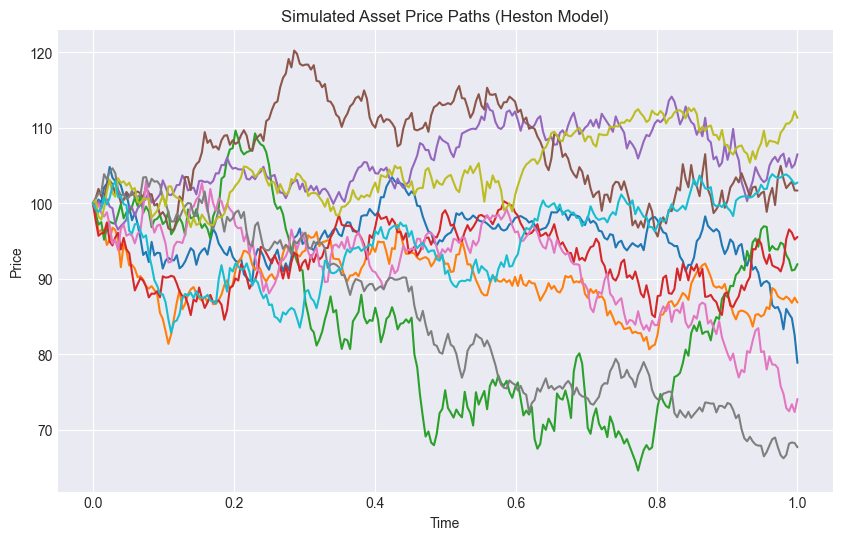

In [17]:
plot_paths(S, T, N, title="Simulated Asset Price Paths (Heston Model)")

## Visualisation of Variance Dynamics

The next figure illustrates several simulated variance paths. The variance exhibits mean reversion around its long-run level $\theta$, while random shocks introduce short-term fluctuations.

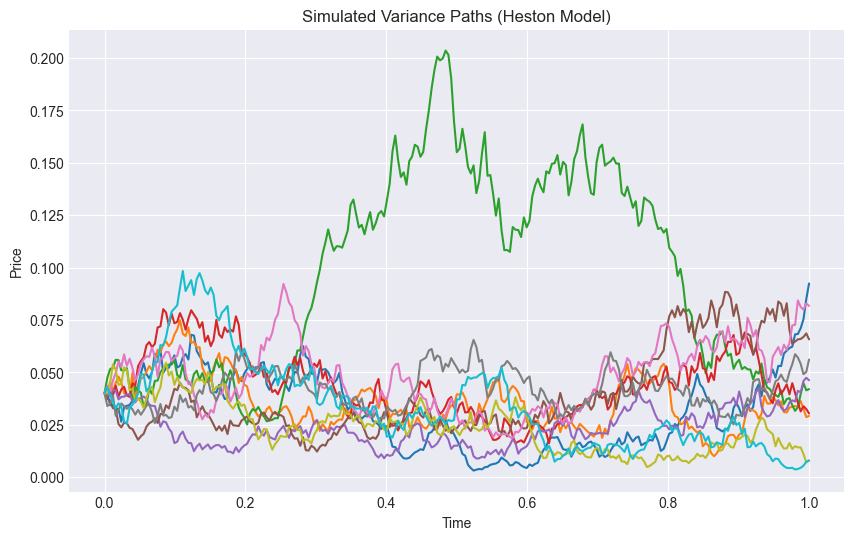

In [18]:
plot_paths(V, T, N, title="Simulated Variance Paths (Heston Model)")

## Summary Statistics

To quantify the results, the average terminal variance and volatility are computed across all simulated paths.

In [29]:
terminal_vol = np.sqrt(np.mean(V[-1]))
avg_vol = np.sqrt(np.mean(V))

print("Average terminal volatility: " + str(round(terminal_vol, 3)))
print("Average volatility over the simulation: " + str(round(avg_vol, 3)))

Average terminal volatility: 0.201
Average volatility over the simulation: 0.201


## Summary

- Implemented the Heston model for stochastic volatility using correlated Brownian motions.
- Simulated price and variance trajectories using the Euler–Maruyama method.
- Demonstrated volatility clustering and mean-reverting behaviour.